In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import math
import itertools
import sklearn
import seaborn as sns
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import time

Using TensorFlow backend.


In [ ]:
# The following lines should be added and batch_size during traing must be reduced if the following error occurs
"""
Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
"""
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print (train.describe())					#Gives statitics of the data

X_train = train.loc[:, train.columns != 'label']
y_labels_train = train["label"]
# print (X_train)
# print (y_labels_train)

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

In [4]:
print (test.describe())					#Gives statitics of the data

X_test = test.loc[:, test.columns != 'label']
# print (X_test)

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000   
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      

In [5]:
X_train = X_train.values
X_test = X_test.values

y_labels_train = y_labels_train.values
lb = preprocessing.LabelBinarizer()
lb.fit(y_labels_train)
output_classes = lb.classes_
print ("No.of Output Classes = ",output_classes)
y_train = lb.transform(y_labels_train)

No.of Output Classes =  [0 1 2 3 4 5 6 7 8 9]


{0: 4132, 1: 4684, 2: 4177, 3: 4351, 4: 4072, 5: 3795, 6: 4137, 7: 4401, 8: 4063, 9: 4188}


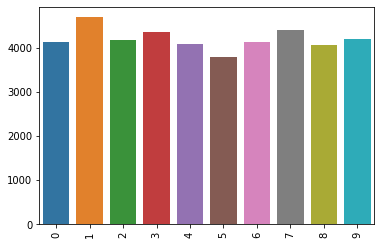

In [6]:
Data_y = {}

for i in output_classes:
    Data_y[i] = 0
for j in y_labels_train:
    Data_y[j] += 1
    
print (Data_y)
plt_ = sns.barplot(list(Data_y.keys()), list(Data_y.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

In [7]:
print ("Shape of Training Set is",X_train.shape)
print ("Shape of Test Set is",X_test.shape)

print ("Shape of Training Set is",y_train.shape)

Shape of Training Set is (42000, 784)
Shape of Test Set is (28000, 784)
Shape of Training Set is (42000, 10)


In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [9]:
keras.backend.clear_session()
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop,Adam

# Our input feature map is 28x28
img_input = layers.Input(shape=(28, 28, 1))

# First convolution extracts 96 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(96, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(48, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(10, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.003),metrics=['acc'])




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        41520     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              122982

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
)
datagen.fit(X_train)
results = model.fit_generator(datagen.flow(X_train,y_train, batch_size=512),
                              epochs = 10, validation_data = datagen.flow(X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] / 512)


Epoch 1/10
Epoch 1/10
263/65 - 11s - loss: 0.0945 - acc: 0.9696
66/65 - 53s - loss: 0.4064 - acc: 0.8709 - val_loss: 0.0963 - val_acc: 0.9696
Epoch 2/10
Epoch 1/10
263/65 - 11s - loss: 0.2655 - acc: 0.9842
66/65 - 52s - loss: 0.0871 - acc: 0.9732 - val_loss: 0.0574 - val_acc: 0.9842
Epoch 3/10
Epoch 1/10
263/65 - 10s - loss: 0.1676 - acc: 0.9845
66/65 - 51s - loss: 0.0625 - acc: 0.9800 - val_loss: 0.0469 - val_acc: 0.9845
Epoch 4/10
Epoch 1/10
263/65 - 12s - loss: 0.2111 - acc: 0.9854
66/65 - 54s - loss: 0.0492 - acc: 0.9843 - val_loss: 0.0440 - val_acc: 0.9854
Epoch 5/10
Epoch 1/10
263/65 - 11s - loss: 0.1577 - acc: 0.9886
66/65 - 51s - loss: 0.0471 - acc: 0.9854 - val_loss: 0.0379 - val_acc: 0.9886
Epoch 6/10
Epoch 1/10
263/65 - 11s - loss: 0.1347 - acc: 0.9882
66/65 - 52s - loss: 0.0377 - acc: 0.9876 - val_loss: 0.0384 - val_acc: 0.9882
Epoch 7/10
Epoch 1/10
263/65 - 11s - loss: 0.2155 - acc: 0.9882
66/65 - 51s - loss: 0.0346 - acc: 0.9885 - val_loss: 0.0382 - val_acc: 0.9882
Epoch 

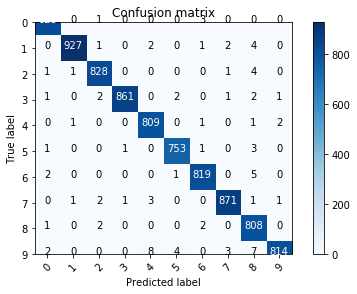

In [12]:
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [13]:
results = model.predict(X_test)
predictions = np.argmax(results,axis = 1)

output_test_data = pd.DataFrame() 
output_test_data['Label'] = predictions
rows = predictions.shape[0]
print (rows)
output_test_data['ImageId'] = list(np.arange(1,rows+1))
submission = output_test_data[['ImageId','Label']]
submission.to_csv("submission.csv", index=False)
submission.tail()

28000


,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
